In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr, spearmanr
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
import matplotlib as mpl
import qgrid

In [2]:
# mpl.rcParams['font.family'] = 'Avenir'
plt.rc('font', family='Helvetica')
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sns.set_palette("Dark2")

In [3]:
drug_score = pd.read_csv("../../data/drug/final_drug_scores_eg_id.tsv", sep="\t")
drug_list = drug_score[
    (drug_score['MultiDrug_correlation'] > 0.4) & (drug_score['sensitive_count'] > 20)][
    'drug_id'].values
drug_list_sensitive = drug_score[(drug_score['sensitive_count'] > 20)][
    'drug_id'].values

In [62]:
colour_list = pd.read_csv('../../data/colour_list.txt',header=None)[0].tolist()

# overall

In [4]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_annotated.csv.gz")
lm_res = lm_res[lm_res['fdr']<0.1].reset_index(drop=True)

In [21]:
n = 10
lm_res.head(n).groupby('ppi').size() / n

ppi
-     0.1
2     0.3
3     0.2
4     0.2
5+    0.1
dtype: float64

In [47]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_res.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k])
        else:
            df[k].append(0)
df = pd.DataFrame(df)

In [52]:
df = {'Top N':[],'T':[], '1':[],'2':[],'3':[],'4':[],'5+':[],'-':[]}
for i in [10, 50, 100, 500, 1000,5000]:
    tmp = lm_res.dropna(subset=['ppi']).head(i).groupby('ppi').size() / i
    tmp_n = 0
    df['Top N'].append(i)
    for k in df.keys():
        if k == 'Top N':
            continue
        if k in tmp:
            df[k].append(tmp[k] + tmp_n)
            tmp_n += tmp[k]
        else:
            df[k].append(0+tmp_n)
df = pd.DataFrame(df)

In [56]:
df_long = pd.melt(df, id_vars=['Top N'], value_name='percentage', var_name='PPI distance')

In [ ]:
g1 = sns.countplot(x='target_pathway',
                   data=dl_ttest_df,
                   order=sorted(dl_ttest_df['target_pathway'].unique()),
                   linewidth=2,
                   edgecolor='black',
                   color='#ff7f0e')
g2 = sns.countplot(x='target_pathway',
                   data=dl_ttest_df[dl_ttest_df['protein_improvement'] > 0],
                   order=sorted(dl_ttest_df['target_pathway'].unique()),
                   linewidth=2,
                   edgecolor='black',
                   color="#1f77b4")

total_patch = mpatches.Patch(color='#ff7f0e', label='RNA better')
improved_patch = mpatches.Patch(color='#1f77b4', label='Protein better')

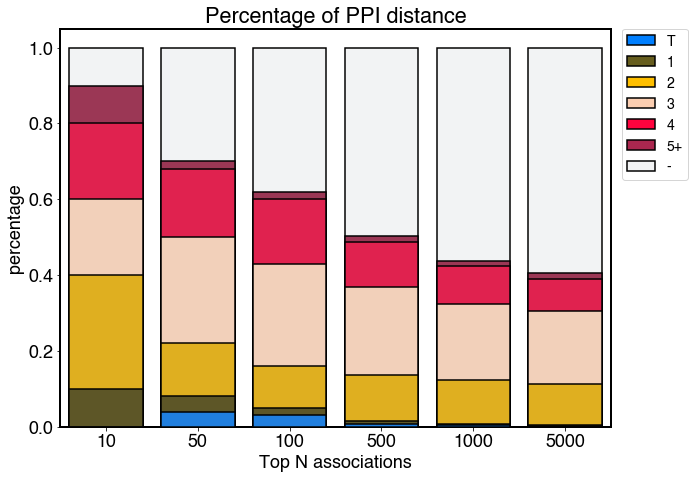

In [80]:
g1 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='T'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[0], zorder=10)
g2 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='1'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[1], zorder=9)
g3 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='2'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[2], zorder=8)
g4 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='3'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[3], zorder=7)
g5 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='4'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[4], zorder=6)
g6 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='5+'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[5], zorder=5)
g7 = sns.barplot(x='Top N',y='percentage', data=df_long[df_long['PPI distance']=='-'],linewidth=1.5,
                   edgecolor='black',
                   color=colour_list[6], zorder=4)
plt.title("Percentage of PPI distance")
plt.xlabel("Top N associations")

g1_patch = mpatches.Patch(facecolor=colour_list[0], label='T', edgecolor='black',linewidth=1.5)
g2_patch = mpatches.Patch(facecolor=colour_list[1], label='1', edgecolor='black',linewidth=1.5)
g3_patch = mpatches.Patch(facecolor=colour_list[2], label='2', edgecolor='black',linewidth=1.5)
g4_patch = mpatches.Patch(facecolor=colour_list[3], label='3', edgecolor='black',linewidth=1.5)
g5_patch = mpatches.Patch(facecolor=colour_list[4], label='4', edgecolor='black',linewidth=1.5)
g6_patch = mpatches.Patch(facecolor=colour_list[5], label='5+', edgecolor='black',linewidth=1.5)
g7_patch = mpatches.Patch(facecolor=colour_list[6], label='-', edgecolor='black',linewidth=1.5)


plt.legend(handles=[g1_patch, g2_patch, g3_patch,g4_patch,g5_patch,g6_patch,g7_patch],bbox_to_anchor=(1.02, 1),
               loc=2,
               borderaxespad=0.,
               prop={'size': 14})
plt.tight_layout()
plt.savefig("../../plots/drug/top_associations_by_PPI.pdf", dpi=500)

In [ ]:
names = ('T','1','2','3','4','5+', '-')
barWidth = 0.85
# Create green Bars
plt.bar(r, greenBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)


In [15]:
qgrid.show_grid(lm_res[lm_res['beta']<0].head(1000), precision=15)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

# per tissue

In [28]:
lm_res = pd.read_csv("../../result_files/lm/lm_sklearn_degr_drug_per_tissue_annotated.csv.gz")
# lm_res = lm_res[lm_res['fdr']<0.1]

In [26]:
lm_res[lm_res['fdr']<0.1].groupby(['tissue']).size()

tissue
Bone                            85856
Breast                          63325
Central Nervous System          31360
Esophagus                      180848
Haematopoietic and Lymphoid     15979
Head and Neck                   59034
Kidney                         115364
Large Intestine                 62846
Lung                              651
Ovary                           60515
Pancreas                       199512
Peripheral Nervous System      200578
Skin                            24237
Stomach                        413883
dtype: int64

In [16]:
lm_res[(lm_res['y_id']=='1909;Venetoclax;GDSC2')&(lm_res['x_id']=='TSNAX')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2
19593,1909;Venetoclax;GDSC2,TSNAX,22,2.489709,939.796400,20,2.191628e-206,4.138525e-204,BCL2,3,1,231547532.5,Stomach,1,-1.56284,0.740261
1023617,1909;Venetoclax;GDSC2,TSNAX,46,1.133458,17.798455,19,2.455825e-05,2.625844e-03,BCL2,3,1,231547532.5,Central Nervous System,1,-1.56284,0.740261


In [27]:
lm_res[(lm_res['y_id']=='1427;AZD5582;GDSC1')&(lm_res['x_id']=='INCENP')]

,y_id,x_id,n,beta,lr,covs,pval,fdr,target,ppi,chr,chr_pos,tissue,attenuated,skew,r2
881627,1427;AZD5582;GDSC1,INCENP,34,-3.26289,16.990238,19,0.000038,0.001453,BIRC2;BIRC3;XIAP,-,11,62138583.5,Breast,0,-1.084352,0.491294


# CRISPR

In [ ]:
lm_rna = pd.read_csv("../../result_files/lm/lm_sklearn_degr_crispr_annotated.csv.gz")